In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load your dataset (assuming it's in a CSV format)
data = pd.read_csv('train_data (1).csv')

# Assuming your date column is named 'Date' and 'price' column has petrol prices

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Prepare the data
ts_data = data['Petrol (USD)']

# Train-test split
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# Create lag features for time series data
def create_lag_features(data, lag):
    for i in range(1, lag + 1):
        data[f'lag_{i}'] = data['Petrol (USD)'].shift(i)
    return data

lag = 5  # Number of lag features
train_data = create_lag_features(train_data.to_frame(), lag).dropna()
test_data = create_lag_features(test_data.to_frame(), lag).dropna()

# Split data into features and target variable
X_train, y_train = train_data.drop('Petrol (USD)', axis=1), train_data['Petrol (USD)']
X_test, y_test = test_data.drop('Petrol (USD)', axis=1), test_data['Petrol (USD)']

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(kernel='linear')
}

# Calculate and store MSE for each model
mse_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[model_name] = mse

# Print the MSE results
for model_name, mse in mse_results.items():
    print(f"{model_name} Mean Squared Error: {mse}")


Linear Regression Mean Squared Error: 2.3423629726016135
Decision Tree Mean Squared Error: 1.2553183544303794
Support Vector Regressor Mean Squared Error: 0.39175783347313214


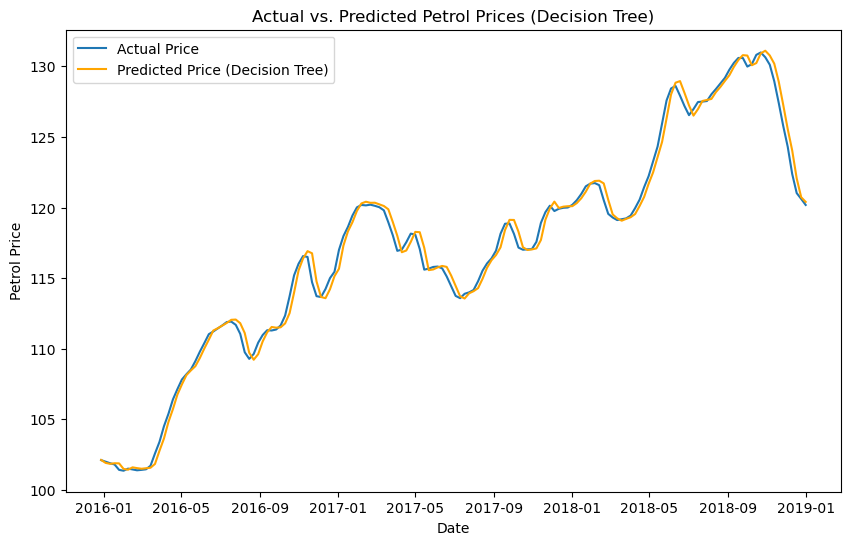

In [2]:
# Plot the actual and predicted prices
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual Price')
plt.plot(test_data.index, y_pred, label='Predicted Price (Decision Tree)', color='orange')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.title('Actual vs. Predicted Petrol Prices (Decision Tree)')
plt.legend()
plt.show()